<a href="https://colab.research.google.com/github/davidfague/Stylized-ReducedOrder-L5-Model/blob/main/RhythmicSpikeTrains.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import scipy.stats as st
from functools import partial
import numpy as np
import matplotlib.pyplot as plt
import scipy

Setting parameters

In [2]:
#setting up mock population of presynaptic neurons

mean_fr = 10   # mean firing rate
std_fr = 2     # std firing rate

a, b = (0 - mean_fr) / std_fr, (100 - mean_fr) / std_fr  #End points for the truncated normal distribution
print('a = ',a)
print('b = ',b)

a =  -5.0
b =  45.0


In [3]:
d = partial(st.truncnorm.rvs, a=a, b=b, loc=mean_fr, scale=std_fr) 

# Creating a function to sample from a simulated population of cells with
# Truncated Normal distribution 
# mean firing rate = 10 
# Std of firing rate = 2
# bounds of -5.0 and 45

In [4]:
def modulateSimSpikes(n_cells,f,depth_of_mod):
  frs = d(size=n_cells) # Calling st.truncnorm.rvs to sample from simulated cells 
                      # Sample size = n_cells = 1000
                    

  t = np.arange(0,t_stop,0.001)
    # t is an array with values ranging from 0 to t_stop with increment 0.001
  z = np.zeros((n_cells,t.shape[0]))
    # Z is a n_cells by t.shape[0] ([1000][100]) matrix of 0's
  
  P = 0
   #Phase of sine wave

  #Loop through each cell
  for i in np.arange(0,n_cells):

    offset = frs[i] #Set 'offest' to the firing rate of cell i 

    mod_trace =  offset * (1 + depth_of_mod * np.sin((2 * np.pi * f * t ) + P))  #set the modulated firing rate values for cell i 
        # (2 * np.pi * f * t) :  an array of size t 
        # np.sin(  )          :  takes the sine of each value of the above array
        # depth_of_mod = 0 (no modulation)   -->  mod_trace = offset 
        # depth_of_mod = 1 (full modulation) -->  mod_trace = offset + (offset * (np.sin((2 * np.pi * f * t ) + P))) 


          #The above is algebrically equivalent to the following 

              # offset + (offset * depth_of_mod * np.sin((2 * np.pi * f * t ) + P))

          #And to:

              # A = offset * (np.sin((2 * np.pi * f * t ) + P) + 1)     #Setting the modulated term
              # B = offset                                              #Setting the constant term 
              # mod_trace = depth_of_mod*A + (1-depth_of_mod)*B         #Adding their components 

    z[i,:] = mod_trace
        # z[i,:] is the instantanous firing rate of cell i
        # Set the ith row of z to an array of firing rates for each time step 

  plt.plot(z[0,:])
  plt.plot(z[1,:])
  plt.plot(z[2,:])
  plt.plot(z[3,:])
  plt.xlim(0,100)


  return z

Generate spikes with firing rates at each time step set bt z

In [5]:
def samplePoissonRVS(z):
#---
#   The Poisson distribution is a discrete probability distribution that expresses the probability of a 
#   given number of events occurring in a fixed interval of time or space if these events occur with a 
#   known constant mean rate and independently of the time since the last event.  
#
#   An unmodulated cell has a constant mean firing rate, but as modulation causes the firing rate to
#   change over time (phase) we consider each small time interval (as determined by length of the timestep) 
#   where the firing rate is constant.
#
#   For a given cell i and a given timestep t we model how many times cell i fires during timestep t
#   using the poisson distribution with λ being set to the firing rate for cell i at time t (adjusted 
#   to be the firing rate per milisecond, i.e. per timstep).
#
#   For a given cell this results in many timesteps that do not have spikes - but apoximatly 10 spikes every 1000 timesteps

  simSpks = []

  #Loop through each cell

  for i in np.arange(0,n_cells):

    r = z[i,:]

    r[r<0] = 0 #Can't have negative firing rates.


    numbPoints = scipy.stats.poisson(r/1000).rvs() 
      # numbPoints is an array of poisson random varibles with length of array = # of time steps
      # Each random variable is a poisson disribution that models the number of spikes that occur for cell i during the interval of each timestep
      # At each timestep t, cell i has a new freqency value given by z[i,t]
        # The poisson random variable that models the number of spikes that occur in cell i at timestep t has the parameter λ = Z[i,t]/1000

    simSpks.append(np.where(numbPoints>0)[0]) 
      # If a spike occurs for cell i at timestep t, append timestep t to simSpks
      # i.e. if the poisson random variable for cell i at timestep t takes a value of 1 then 't' will be appended to simSpks

  return simSpks

Ploting

In [6]:
# plt.plot(z[0,:])
# plt.plot(z[1,:])
# plt.plot(z[2,:])
# plt.plot(z[3,:])
# plt.xlim(0,100)

#Depth of modulation = 0

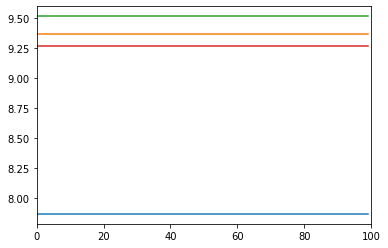

In [7]:
t_stop = 0.1 #seconds
n_cells = 1000 
depth_of_mod = 0 # depth of modulation #define 
f = 64 # frequency of oscillation (Gamma inhibition)

z = modulateSimSpikes(n_cells,f,depth_of_mod)
raster = samplePoissonRVS(z)

Text(0, 0.5, 'node ID')

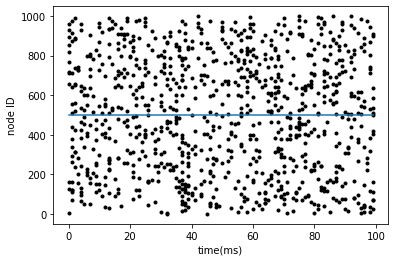

In [8]:
for i in np.arange(0,z.shape[0]):
    plt.plot(raster[i],np.ones((raster[i].shape[0]))*i,'k.')

t = np.arange(0,t_stop,0.001)
plt.plot(100*depth_of_mod*np.sin(2 * np.pi * f * t)+500)
plt.xlabel('time(ms)')
plt.ylabel('node ID')

#Depth of modulation = 0.5

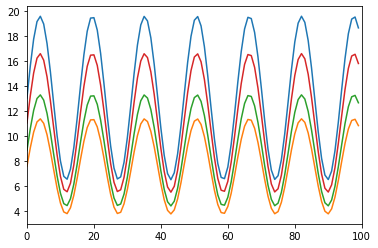

In [9]:
t_stop = 0.1 #seconds
n_cells = 1000 
depth_of_mod = 0.5 # depth of modulation #define 
f = 64 # frequency of oscillation (Gamma inhibition)

z = modulateSimSpikes(n_cells,f,depth_of_mod)
raster = samplePoissonRVS(z)

Text(0, 0.5, 'node ID')

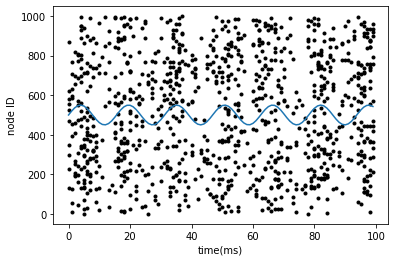

In [10]:
for i in np.arange(0,z.shape[0]):
    plt.plot(raster[i],np.ones((raster[i].shape[0]))*i,'k.')

t = np.arange(0,t_stop,0.001)
plt.plot(100*depth_of_mod*np.sin(2 * np.pi * f * t)+500)
plt.xlabel('time(ms)')
plt.ylabel('node ID')

#Depth of modulation = 1

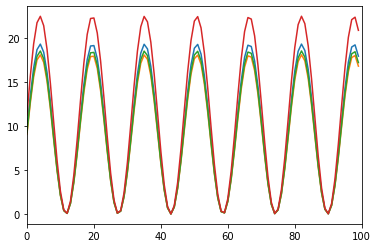

In [11]:
t_stop = 0.1 #seconds
n_cells = 1000 
depth_of_mod = 1 # depth of modulation #define 
f = 64 # frequency of oscillation (Gamma inhibition)

z = modulateSimSpikes(n_cells,f,depth_of_mod)
raster = samplePoissonRVS(z)

Text(0, 0.5, 'node ID')

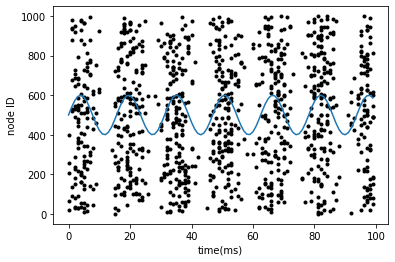

In [12]:
for i in np.arange(0,z.shape[0]):
    plt.plot(raster[i],np.ones((raster[i].shape[0]))*i,'k.')

t = np.arange(0,t_stop,0.001)
plt.plot(100*depth_of_mod*np.sin(2 * np.pi * f * t)+500)
plt.xlabel('time(ms)')
plt.ylabel('node ID')

In [13]:

# spikes_at_t = np.zeros((n_cells,t.shape[0]))
# fr_at_t = np.zeros(t.shape[0])


# for j in np.arange(0,t.shape[0]):
#   for i in np.arange(0,n_cells):
#     #spikes_at_t = np.count_nonzero()
#     spikes_at_t[i,j] += raster[i,j]
  
#   fr_at_t[j] = spikes_at_t[i,j] / 1000


# # avg = (totalSpks/1000)* (1/t_stop)
# # print(avg)


#We verify that the arverage firing rate is unchanged after modulation